In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from helpers.funcs import resample, single_ts_split, timeseries_train_test_split as TSSplit
import matplotlib.pyplot as plt
%matplotlib inline
NB_SEED = 123123

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  retu

In [2]:
def setindexdatetime(df, index_col):
    df[index_col] = pd.to_datetime(df[index_col])
    df.set_index(index_col, inplace=True)
    df = df.astype(np.float)
    return df

In [3]:
tr = setindexdatetime(pd.read_csv('valids/v_ready_iqr_tr.csv'),'Timestamp')
ts = setindexdatetime(pd.read_csv('valids/v_ready_iqr_ts.csv'),'Timestamp')

In [4]:
tr.index.freq = '15T'

In [5]:
ts = resample(ts)

/home/berkkarahan/Desktop/tupras/helpers/funcs.py:38: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  tseries.index[0], pd.tslib.Timestamp), 'Object must have a datetime-like index.'
/home/berkkarahan/Desktop/tupras/helpers/funcs.py:72: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  tseries = tseries.resample(short_rate, how='mean').interpolate()
/home/berkkarahan/Desktop/tupras/helpers/funcs.py:75: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ffill()
  tseries = tseries.resample(rate, how='ffill')


In [9]:
x_tr, x_ts, y_tr, y_ts = TSSplit(tr.drop('Target',1),tr.Target, test_size=0.30)

In [10]:
from sklearn.linear_model import LinearRegression, ElasticNet, HuberRegressor, Ridge

In [70]:
reg = LinearRegression(n_jobs=-1)#booster='gblinear')

In [71]:
from helpers.funcs import fit_model_cv

In [72]:
mdls = fit_model_cv(reg,x_tr.values,y_tr.values)

In [73]:
y_pred = np.zeros((y_ts.shape[0],len(mdls)))
for i, m in enumerate(mdls):
    y_pred[:,i]= m.predict(x_ts.values)
y_pred = y_pred.mean(axis=1)

In [74]:
y_pred = pd.Series(data=y_pred, index=y_ts.index)

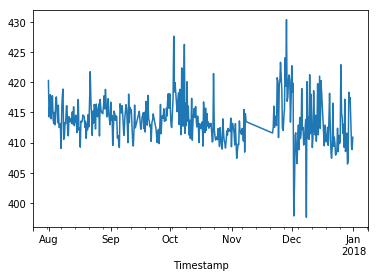

In [75]:
y_pred.plot()

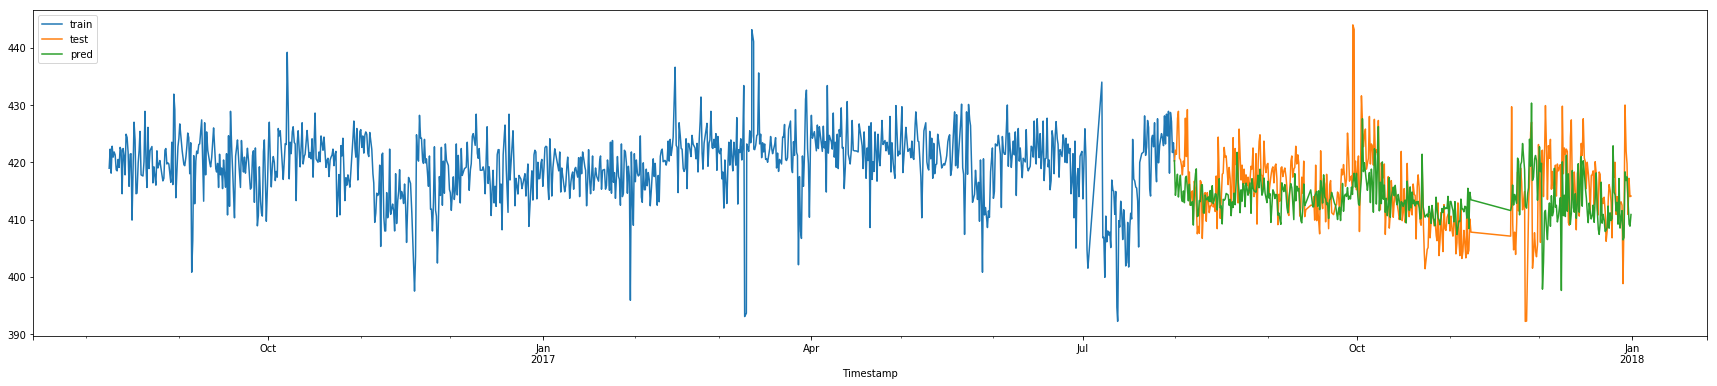

In [76]:
fig, ax = plt.subplots(figsize=(30,6))
y_tr.plot(label='train')
y_ts.plot(label='test')
y_pred.plot(label='pred')
plt.legend(loc='upper left')

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [78]:
def print_metric(metrictr, metricts ,mname):
    print(mname +' train: ' + str(metrictr) + ' validation: ' + str(metricts))

In [79]:
mdls = fit_model_cv(reg,x_tr.values,y_tr.values)
y_pred_val = np.zeros((y_ts.shape[0],len(mdls)))
y_pred_tr = np.zeros((y_tr.shape[0],len(mdls)))
for i, m in enumerate(mdls):
    y_pred_val[:,i]= m.predict(x_ts.values)
    y_pred_tr[:,i] = m.predict(x_tr.values)
y_pred_val = y_pred_val.mean(axis=1)
y_pred_tr = y_pred_tr.mean(axis=1)

In [80]:
mse_tr = mean_squared_error(y_tr.values, y_pred_tr)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_tr.values, y_pred_tr)
r2_tr=r2_score(y_tr, y_pred_tr)
mse_ts = mean_squared_error(y_ts.values, y_pred_val)
rmse_ts = np.sqrt(mse_ts)
mae_ts = mean_absolute_error(y_ts.values, y_pred_val)
r2_ts = r2_score(y_ts.values, y_pred_val)

In [81]:
print_metric(mse_tr,mse_ts,'MSE')
print_metric(rmse_tr,rmse_ts,'RMSE')
print_metric(mae_tr,mae_ts,'MAE')
print_metric(r2_tr,r2_ts,'R2')

MSE train: 20.762008593407625 validation: 31.84106438732449
RMSE train: 4.556534713288995 validation: 5.6427887065992905
MAE train: 3.3423344888584015 validation: 4.349993182432847
R2 train: 0.23178800040953862 validation: 0.10747463227028142


In [23]:
reg = ElasticNet(random_state=NB_SEED,l1_ratio=0.2)

In [24]:
mdls = fit_model_cv(reg,x_tr.values,y_tr.values)
y_pred_val = np.zeros((y_ts.shape[0],len(mdls)))
y_pred_tr = np.zeros((y_tr.shape[0],len(mdls)))
for i, m in enumerate(mdls):
    y_pred_val[:,i]= m.predict(x_ts.values)
    y_pred_tr[:,i] = m.predict(x_tr.values)
y_pred_val = y_pred_val.mean(axis=1)
y_pred_tr = y_pred_tr.mean(axis=1)

In [25]:
mse_tr = mean_squared_error(y_tr.values, y_pred_tr)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_tr.values, y_pred_tr)
r2_tr=r2_score(y_tr, y_pred_tr)
mse_ts = mean_squared_error(y_ts.values, y_pred_val)
rmse_ts = np.sqrt(mse_ts)
mae_ts = mean_absolute_error(y_ts.values, y_pred_val)
r2_ts = r2_score(y_ts.values, y_pred_val)

In [26]:
print_metric(mse_tr,mse_ts,'MSE')
print_metric(rmse_tr,rmse_ts,'RMSE')
print_metric(mae_tr,mae_ts,'MAE')
print_metric(r2_tr,r2_ts,'R2')

MSE train: 19.165142077691936 test: 31.884745681355128
RMSE train: 4.377801055060855 test: 5.646657921404052
MAE train: 3.2195322176899395 test: 4.350501863933419
R2 train: 0.2908734214369876 test: 0.10625021770475818


In [27]:
y_pred = pd.Series(data=y_pred_val, index=y_ts.index)

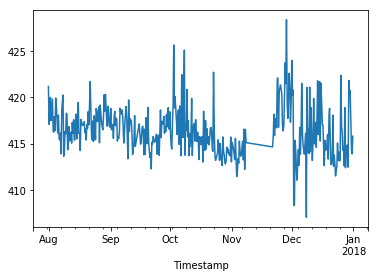

In [28]:
y_pred.plot()

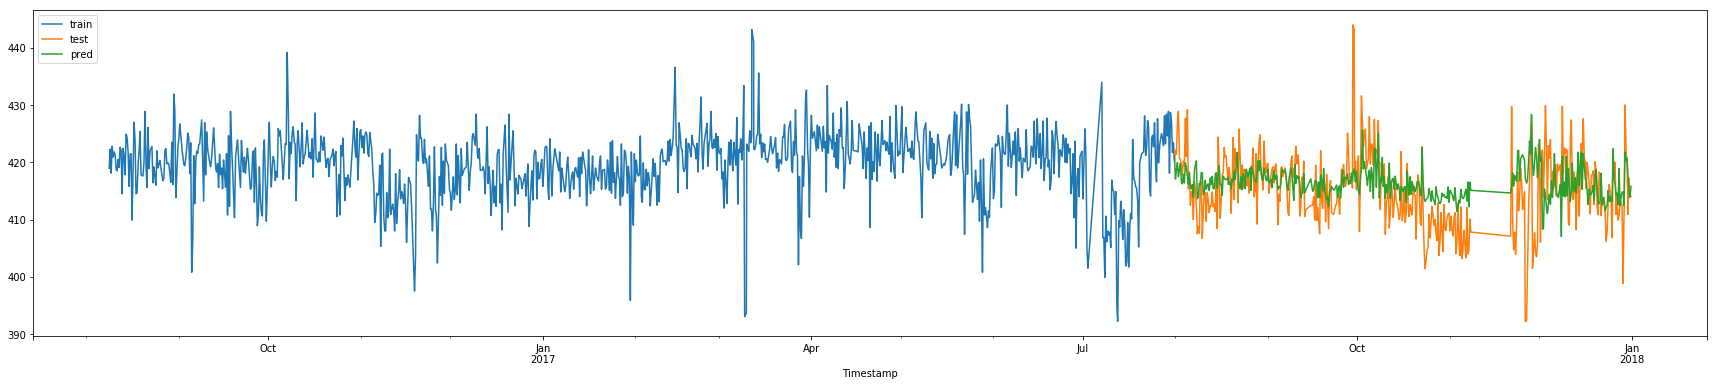

In [29]:
fig, ax = plt.subplots(figsize=(30,6))
y_tr.plot(label='train')
y_ts.plot(label='test')
y_pred.plot(label='pred')
plt.legend(loc='upper left')

In [30]:
reg = HuberRegressor()

In [31]:
mdls = fit_model_cv(reg,x_tr.values,y_tr.values)
y_pred_val = np.zeros((y_ts.shape[0],len(mdls)))
y_pred_tr = np.zeros((y_tr.shape[0],len(mdls)))
for i, m in enumerate(mdls):
    y_pred_val[:,i]= m.predict(x_ts.values)
    y_pred_tr[:,i] = m.predict(x_tr.values)
y_pred_val = y_pred_val.mean(axis=1)
y_pred_tr = y_pred_tr.mean(axis=1)

In [32]:
mse_tr = mean_squared_error(y_tr.values, y_pred_tr)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_tr.values, y_pred_tr)
r2_tr=r2_score(y_tr, y_pred_tr)
mse_ts = mean_squared_error(y_ts.values, y_pred_val)
rmse_ts = np.sqrt(mse_ts)
mae_ts = mean_absolute_error(y_ts.values, y_pred_val)
r2_ts = r2_score(y_ts.values, y_pred_val)

In [33]:
print_metric(mse_tr,mse_ts,'MSE')
print_metric(rmse_tr,rmse_ts,'RMSE')
print_metric(mae_tr,mae_ts,'MAE')
print_metric(r2_tr,r2_ts,'R2')

MSE train: 23.57208907384183 test: 39.1375152535731
RMSE train: 4.855109584122879 test: 6.255998341877426
MAE train: 3.5640090998750167 test: 4.762532161136678
R2 train: 0.12781262947312888 test: -0.09704954485216444


In [34]:
y_pred = pd.Series(data=y_pred_val, index=y_ts.index)

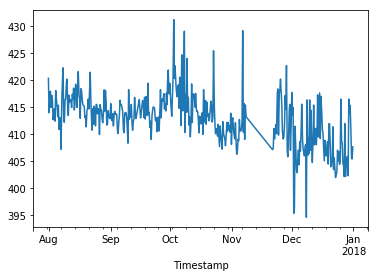

In [35]:
y_pred.plot()

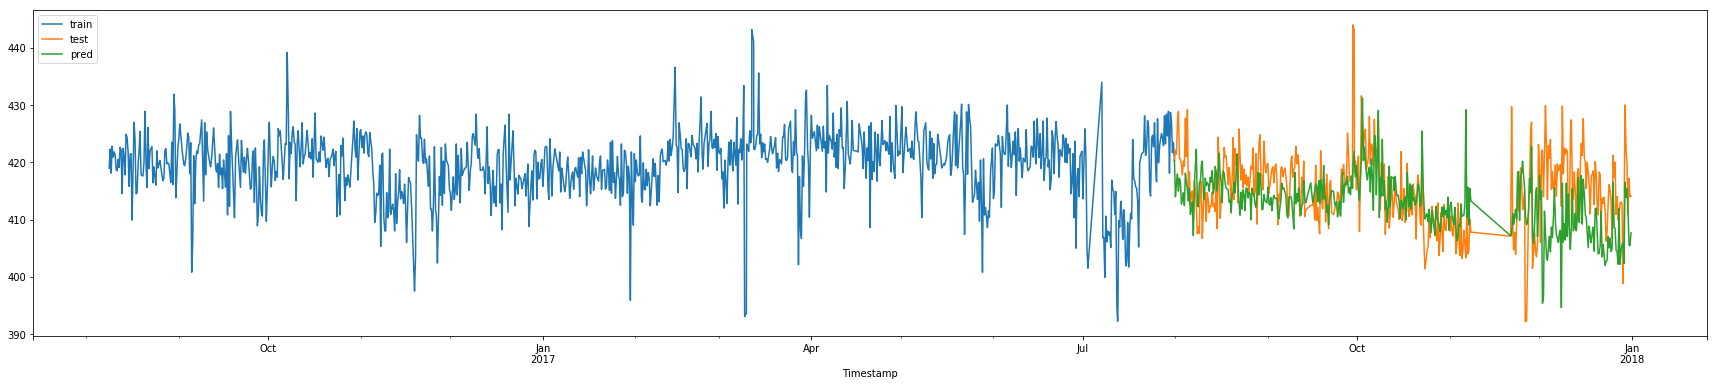

In [36]:
fig, ax = plt.subplots(figsize=(30,6))
y_tr.plot(label='train')
y_ts.plot(label='test')
y_pred.plot(label='pred')
plt.legend(loc='upper left')

In [37]:
reg = Ridge(random_state=NB_SEED)

In [38]:
mdls = fit_model_cv(reg,x_tr.values,y_tr.values)
y_pred_val = np.zeros((y_ts.shape[0],len(mdls)))
y_pred_tr = np.zeros((y_tr.shape[0],len(mdls)))
for i, m in enumerate(mdls):
    y_pred_val[:,i]= m.predict(x_ts.values)
    y_pred_tr[:,i] = m.predict(x_tr.values)
y_pred_val = y_pred_val.mean(axis=1)
y_pred_tr = y_pred_tr.mean(axis=1)

In [39]:
mse_tr = mean_squared_error(y_tr.values, y_pred_tr)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_tr.values, y_pred_tr)
r2_tr=r2_score(y_tr, y_pred_tr)
mse_ts = mean_squared_error(y_ts.values, y_pred_val)
rmse_ts = np.sqrt(mse_ts)
mae_ts = mean_absolute_error(y_ts.values, y_pred_val)
r2_ts = r2_score(y_ts.values, y_pred_val)

In [40]:
print_metric(mse_tr,mse_ts,'MSE')
print_metric(rmse_tr,rmse_ts,'RMSE')
print_metric(mae_tr,mae_ts,'MAE')
print_metric(r2_tr,r2_ts,'R2')

MSE train: 19.661427054335082 test: 30.827917333611634
RMSE train: 4.4341207757948 test: 5.552289377690219
MAE train: 3.247075027034066 test: 4.247547643728879
R2 train: 0.2725104546479846 test: 0.13587379115767484


In [41]:
y_pred = pd.Series(data=y_pred_val, index=y_ts.index)

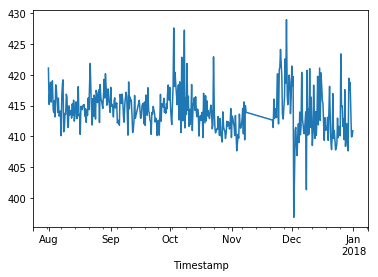

In [42]:
y_pred.plot()

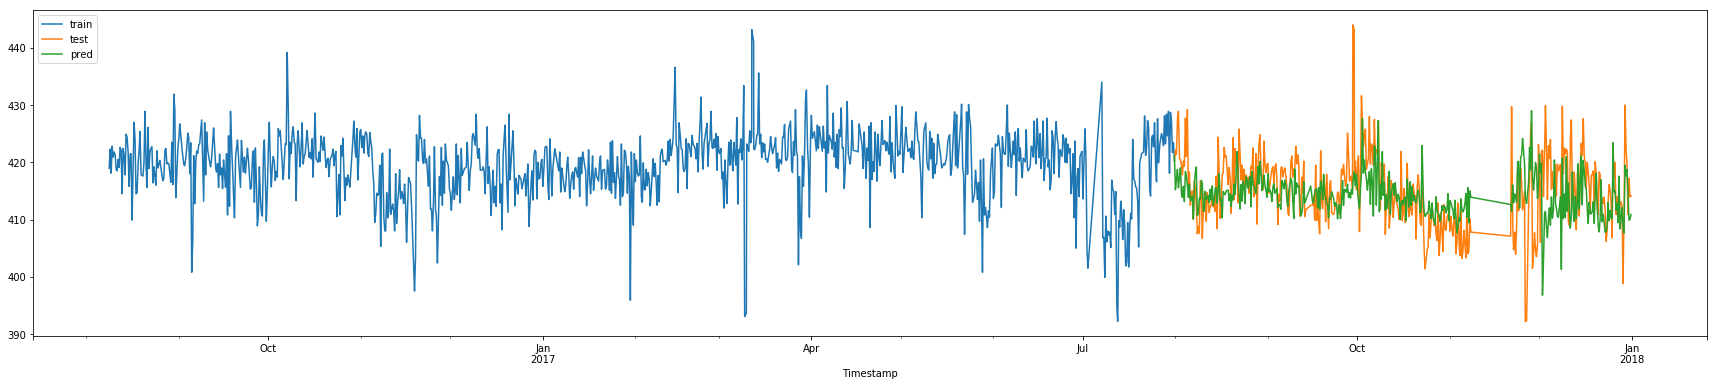

In [43]:
fig, ax = plt.subplots(figsize=(30,6))
y_tr.plot(label='train')
y_ts.plot(label='test')
y_pred.plot(label='pred')
plt.legend(loc='upper left')

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [83]:
reg = Pipeline([('poly', PolynomialFeatures(degree=2)),
                ('linear', LinearRegression(fit_intercept=False))])

In [84]:
mdls = fit_model_cv(reg,x_tr.values,y_tr.values)
y_pred_val = np.zeros((y_ts.shape[0],len(mdls)))
y_pred_tr = np.zeros((y_tr.shape[0],len(mdls)))
for i, m in enumerate(mdls):
    y_pred_val[:,i]= m.predict(x_ts.values)
    y_pred_tr[:,i] = m.predict(x_tr.values)
y_pred_val = y_pred_val.mean(axis=1)
y_pred_tr = y_pred_tr.mean(axis=1)

In [85]:
mse_tr = mean_squared_error(y_tr.values, y_pred_tr)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_tr.values, y_pred_tr)
r2_tr=r2_score(y_tr, y_pred_tr)
mse_ts = mean_squared_error(y_ts.values, y_pred_val)
rmse_ts = np.sqrt(mse_ts)
mae_ts = mean_absolute_error(y_ts.values, y_pred_val)
r2_ts = r2_score(y_ts.values, y_pred_val)

In [86]:
print_metric(mse_tr,mse_ts,'MSE')
print_metric(rmse_tr,rmse_ts,'RMSE')
print_metric(mae_tr,mae_ts,'MAE')
print_metric(r2_tr,r2_ts,'R2')

MSE train: 259.1647586027206 validation: 681.9826888540643
RMSE train: 16.09859492635058 validation: 26.114798273279163
MAE train: 8.209783874621618 validation: 14.23222917875196
R2 train: -8.589316781845067 validation: -18.11641026664568


In [51]:
y_pred = pd.Series(data=y_pred_val, index=y_ts.index)

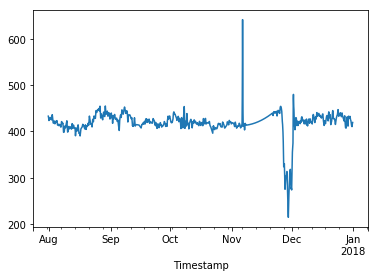

In [52]:
y_pred.plot()

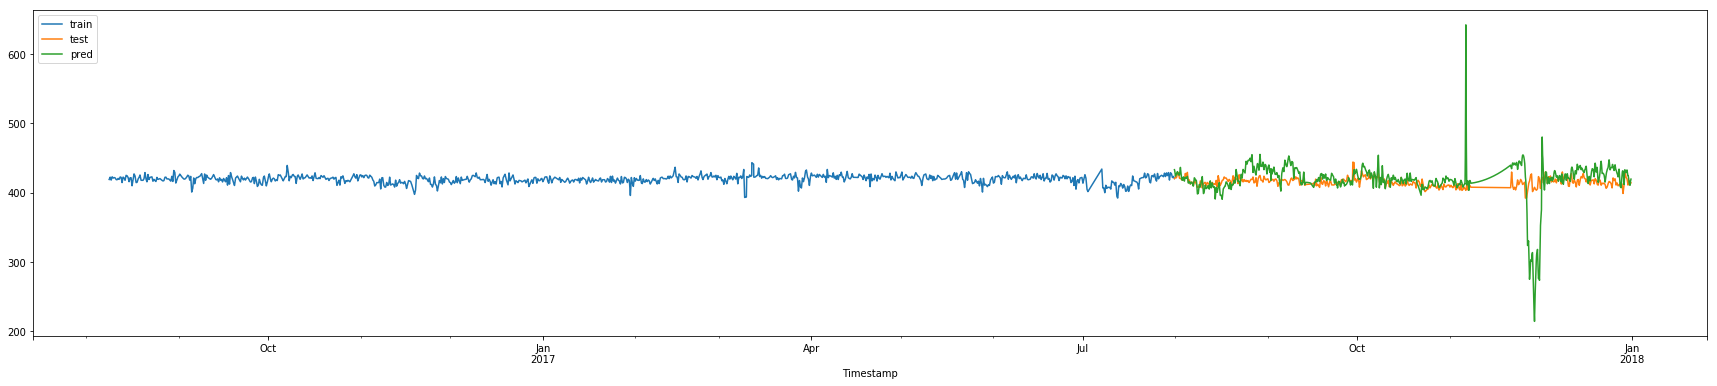

In [53]:
fig, ax = plt.subplots(figsize=(30,6))
y_tr.plot(label='train')
y_ts.plot(label='test')
y_pred.plot(label='pred')
plt.legend(loc='upper left')

In [54]:
reg = Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))])

In [55]:
mdls = fit_model_cv(reg,x_tr.values,y_tr.values)
y_pred_val = np.zeros((y_ts.shape[0],len(mdls)))
y_pred_tr = np.zeros((y_tr.shape[0],len(mdls)))
for i, m in enumerate(mdls):
    y_pred_val[:,i]= m.predict(x_ts.values)
    y_pred_tr[:,i] = m.predict(x_tr.values)
y_pred_val = y_pred_val.mean(axis=1)
y_pred_tr = y_pred_tr.mean(axis=1)

In [56]:
mse_tr = mean_squared_error(y_tr.values, y_pred_tr)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_tr.values, y_pred_tr)
r2_tr=r2_score(y_tr, y_pred_tr)
mse_ts = mean_squared_error(y_ts.values, y_pred_val)
rmse_ts = np.sqrt(mse_ts)
mae_ts = mean_absolute_error(y_ts.values, y_pred_val)
r2_ts = r2_score(y_ts.values, y_pred_val)

In [57]:
print_metric(mse_tr,mse_ts,'MSE')
print_metric(rmse_tr,rmse_ts,'RMSE')
print_metric(mae_tr,mae_ts,'MAE')
print_metric(r2_tr,r2_ts,'R2')

MSE train: 21310.960390010736 test: 169373.4753747906
RMSE train: 145.982740041454 test: 411.55008853697336
MAE train: 52.92754243149584 test: 122.75205484678114
R2 train: -787.5236835708424 test: -4746.646672663501


In [58]:
y_pred = pd.Series(data=y_pred_val, index=y_ts.index)

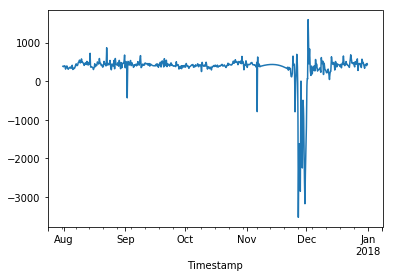

In [59]:
y_pred.plot()

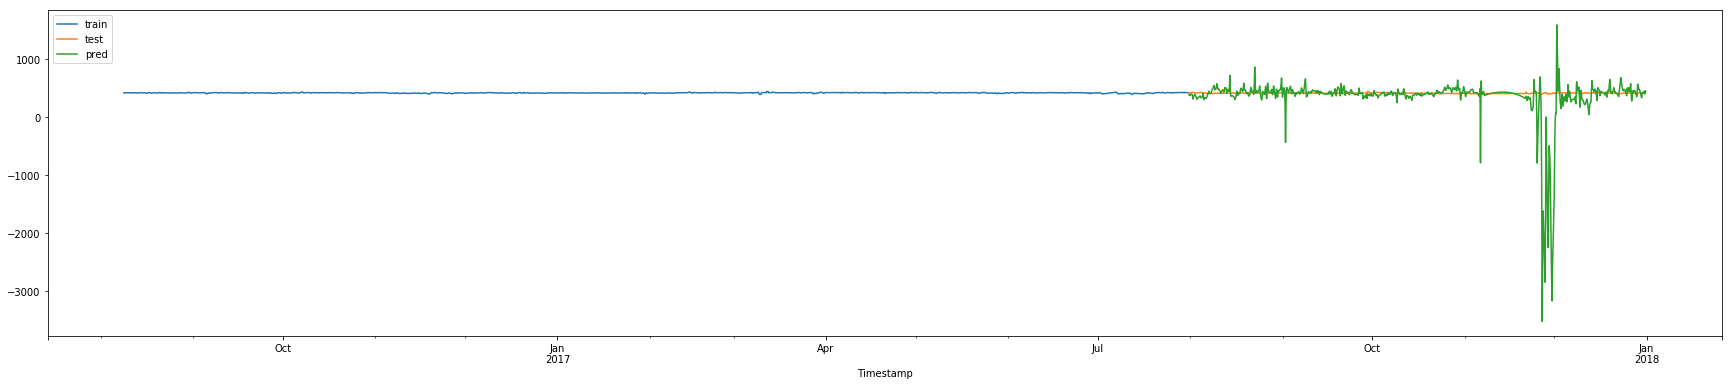

In [60]:
fig, ax = plt.subplots(figsize=(30,6))
y_tr.plot(label='train')
y_ts.plot(label='test')
y_pred.plot(label='pred')
plt.legend(loc='upper left')

In [61]:
reg = Pipeline([('poly', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression(fit_intercept=False))])

In [62]:
mdls = fit_model_cv(reg,x_tr.values,y_tr.values)
y_pred_val = np.zeros((y_ts.shape[0],len(mdls)))
y_pred_tr = np.zeros((y_tr.shape[0],len(mdls)))
for i, m in enumerate(mdls):
    y_pred_val[:,i]= m.predict(x_ts.values)
    y_pred_tr[:,i] = m.predict(x_tr.values)
y_pred_val = y_pred_val.mean(axis=1)
y_pred_tr = y_pred_tr.mean(axis=1)

In [63]:
mse_tr = mean_squared_error(y_tr.values, y_pred_tr)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_tr.values, y_pred_tr)
r2_tr=r2_score(y_tr, y_pred_tr)
mse_ts = mean_squared_error(y_ts.values, y_pred_val)
rmse_ts = np.sqrt(mse_ts)
mae_ts = mean_absolute_error(y_ts.values, y_pred_val)
r2_ts = r2_score(y_ts.values, y_pred_val)

In [64]:
print_metric(mse_tr,mse_ts,'MSE')
print_metric(rmse_tr,rmse_ts,'RMSE')
print_metric(mae_tr,mae_ts,'MAE')
print_metric(r2_tr,r2_ts,'R2')

MSE train: 233743.79150375378 test: 3688628.946278862
RMSE train: 483.4705694287438 test: 1920.5803670450405
MAE train: 119.30667700891757 test: 379.3987689219227
R2 train: -8647.719349821009 test: -103393.6248356762


In [65]:
y_pred = pd.Series(data=y_pred_val, index=y_ts.index)

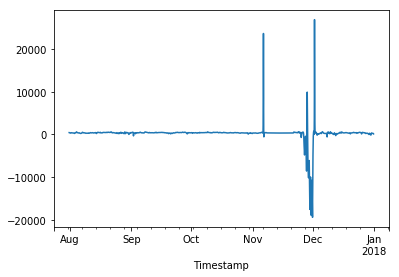

In [66]:
y_pred.plot()

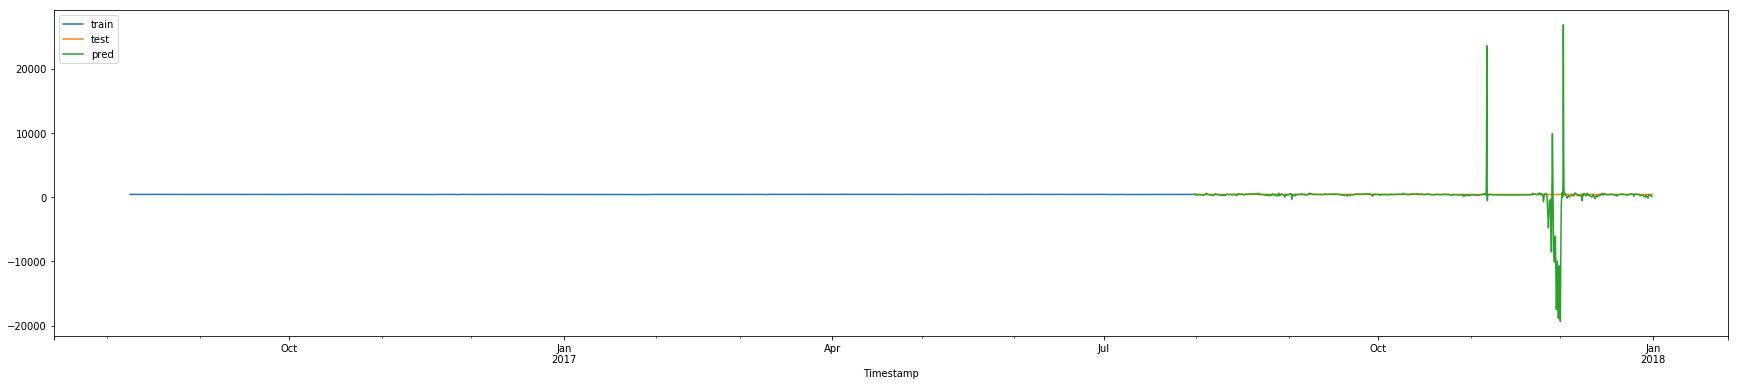

In [67]:
fig, ax = plt.subplots(figsize=(30,6))
y_tr.plot(label='train')
y_ts.plot(label='test')
y_pred.plot(label='pred')
plt.legend(loc='upper left')

In [87]:
from sklearn.svm import SVR

In [88]:
reg = SVR(kernel='linear')

In [89]:
mdls = fit_model_cv(reg,x_tr.values,y_tr.values)
y_pred_val = np.zeros((y_ts.shape[0],len(mdls)))
y_pred_tr = np.zeros((y_tr.shape[0],len(mdls)))
for i, m in enumerate(mdls):
    y_pred_val[:,i]= m.predict(x_ts.values)
    y_pred_tr[:,i] = m.predict(x_tr.values)
y_pred_val = y_pred_val.mean(axis=1)
y_pred_tr = y_pred_tr.mean(axis=1)

In [90]:
mse_tr = mean_squared_error(y_tr.values, y_pred_tr)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_tr.values, y_pred_tr)
r2_tr=r2_score(y_tr, y_pred_tr)
mse_ts = mean_squared_error(y_ts.values, y_pred_val)
rmse_ts = np.sqrt(mse_ts)
mae_ts = mean_absolute_error(y_ts.values, y_pred_val)
r2_ts = r2_score(y_ts.values, y_pred_val)

In [91]:
print_metric(mse_tr,mse_ts,'MSE')
print_metric(rmse_tr,rmse_ts,'RMSE')
print_metric(mae_tr,mae_ts,'MAE')
print_metric(r2_tr,r2_ts,'R2')

MSE train: 245.93075575220624 validation: 469.8343834766614
RMSE train: 15.682179560003968 validation: 21.67566339184712
MAE train: 12.351329511911159 validation: 16.6266684150875
R2 train: -8.099647405848007 validation: -12.169757794011002


In [92]:
y_pred = pd.Series(data=y_pred_val, index=y_ts.index)

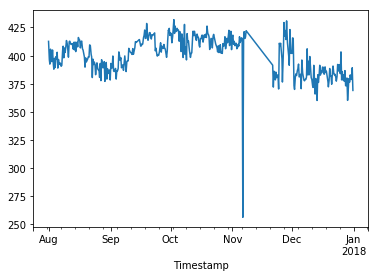

In [93]:
y_pred.plot()

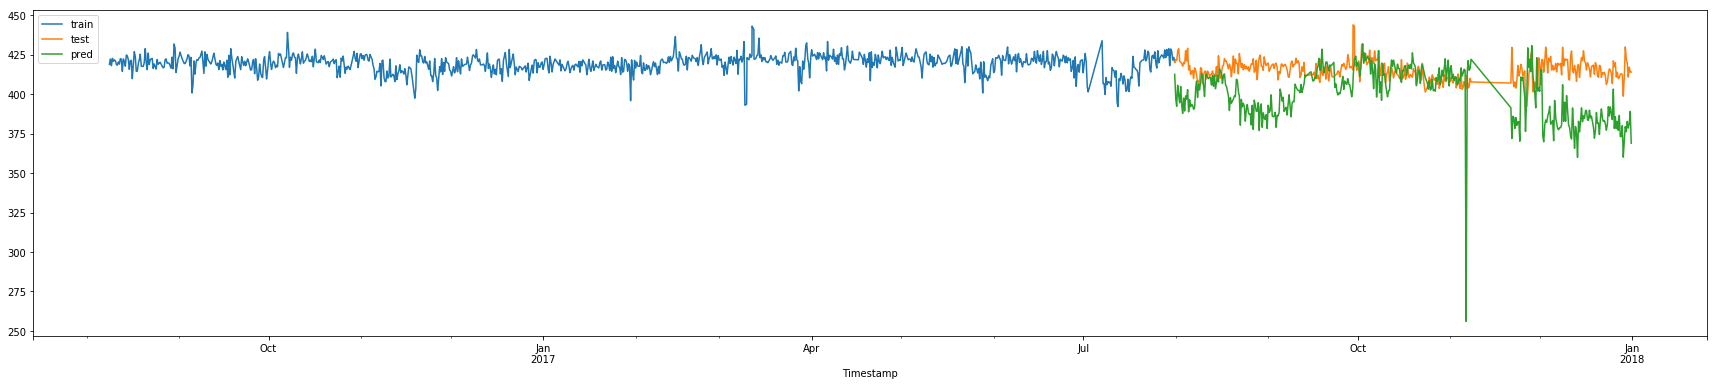

In [94]:
fig, ax = plt.subplots(figsize=(30,6))
y_tr.plot(label='train')
y_ts.plot(label='test')
y_pred.plot(label='pred')
plt.legend(loc='upper left')

In [95]:
reg = SVR(kernel='rbf')

In [96]:
mdls = fit_model_cv(reg,x_tr.values,y_tr.values)
y_pred_val = np.zeros((y_ts.shape[0],len(mdls)))
y_pred_tr = np.zeros((y_tr.shape[0],len(mdls)))
for i, m in enumerate(mdls):
    y_pred_val[:,i]= m.predict(x_ts.values)
    y_pred_tr[:,i] = m.predict(x_tr.values)
y_pred_val = y_pred_val.mean(axis=1)
y_pred_tr = y_pred_tr.mean(axis=1)

In [97]:
mse_tr = mean_squared_error(y_tr.values, y_pred_tr)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_tr.values, y_pred_tr)
r2_tr=r2_score(y_tr, y_pred_tr)
mse_ts = mean_squared_error(y_ts.values, y_pred_val)
rmse_ts = np.sqrt(mse_ts)
mae_ts = mean_absolute_error(y_ts.values, y_pred_val)
r2_ts = r2_score(y_ts.values, y_pred_val)

In [98]:
print_metric(mse_tr,mse_ts,'MSE')
print_metric(rmse_tr,rmse_ts,'RMSE')
print_metric(mae_tr,mae_ts,'MAE')
print_metric(r2_tr,r2_ts,'R2')

MSE train: 21.691329887034975 validation: 62.6751371743421
RMSE train: 4.65739518261388 validation: 7.9167630490208625
MAE train: 3.0482375437328515 validation: 6.401612811480505
R2 train: 0.19740232110362876 validation: -0.7568241178617405


In [99]:
y_pred = pd.Series(data=y_pred_val, index=y_ts.index)

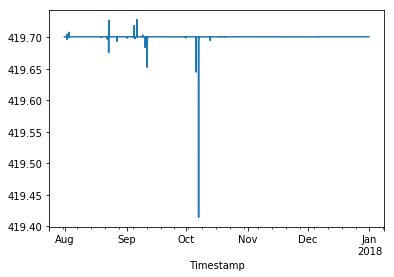

In [100]:
y_pred.plot()

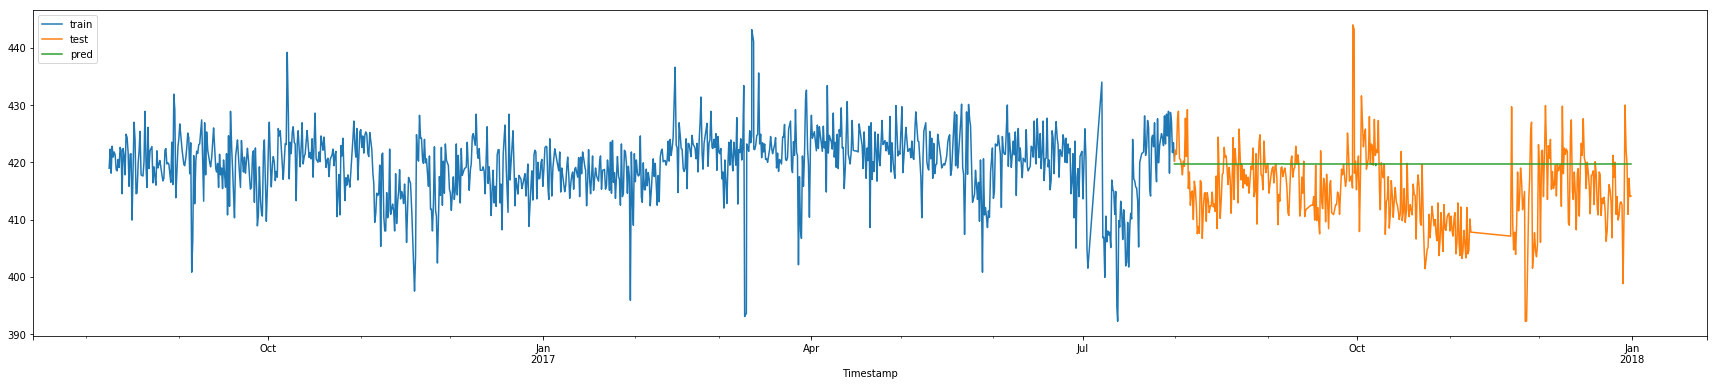

In [101]:
fig, ax = plt.subplots(figsize=(30,6))
y_tr.plot(label='train')
y_ts.plot(label='test')
y_pred.plot(label='pred')
plt.legend(loc='upper left')